In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize

https://stackoverflow.com/questions/77547490/use-a-nonlinear-poisson-regression-with-two-independent-variables?noredirect=1#comment136714652_77547490

In [9]:
data = np.array([1, 3, 1, 2, 2])

In [40]:
bins = np.arange(0.5, 4., 1)
centers = (bins[1:] + bins[:-1])/2

In [41]:
density, _ = np.histogram(data, bins=bins, density=1.)

In [62]:
centers, density

(array([1., 2., 3.]), array([0.4, 0.4, 0.2]))

In [42]:
def model(k, mu):
    return stats.poisson.pmf(k, mu)

In [61]:
popt, pcov = optimize.curve_fit(model, centers, density)
popt

array([1.71050156])

In [44]:
X = stats.poisson(1.8)

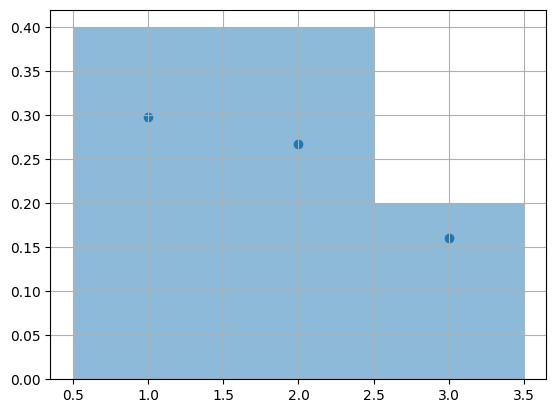

In [45]:
fig, axe = plt.subplots()
axe.hist(data, bins=bins, density=1., alpha=0.5)
axe.scatter(centers, X.pmf(centers))
axe.grid()

In [57]:
def negative_log_likelihood(params, data):
    return - stats.poisson.logpmf(data, params[0]).sum()

In [58]:
result = optimize.minimize(
    negative_log_likelihood,
    x0=[2],
    args=(data,),
    #method='Powell',
)

In [59]:
result

      fun: 6.8879738462437246
 hess_inv: array([[0.36129333]])
      jac: array([9.05990601e-06])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([1.80000327])